# Import model and solutions...

In [1]:
from cleaner_roots import *
rmodel=rebuild_roots(1)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-06


No objective coefficients in model. Unclear what should be optimized


Model SA:  0.0013646293089030663
New nitrate uptake:  7.411107187140232
Old nitrate uptake:  3.42482983648147
New phosphate uptake:  0.3218089151103348


In [2]:
datev='2023_03_20'
sol,fva_sol=unpickle('proton_bal_maint'+datev)
datev='2023_03_19'
solf,fva_solf=unpickle('prot_constr_maint_noferm'+datev)
solef,fva_solef=unpickle('prot_constr_maint_noferm'+datev)#unpickle('prot_constr_nolact'+datev)

In [165]:
import pickle as pkl
file_label = 'proton_constr_ferm2023_03_08'
with open('roots_'+file_label+'.pkl','rb') as file:
    solp=pkl.load(file)

In [5]:
rxn=rmodel.reactions[0]
print(rxn.id[-6:-2])

_epi


In [5]:
gly_transitions={'FRU':'FRUCTOSE_6P','FRUCTOSE_6P':'FRUCTOSE_16_DIPHOSPHATE','FRUCTOSE_16_DIPHOSPHATE':'GAP+DIHYDROXY_ACETONE_PHOSPHATE','DIHYDROXY_ACETONE_PHOSPHATE':'GAP','GAP':'DPG+G3P','DPG':'G3P','G3P':'2_PG','2_PG':'PHOSPHO_ENOL_PYRUVATE','PHOSPHO_ENOL_PYRUVATE':'PYRUVATE'}
dont_include=['_mc_','_pc_','_xc_','_vc_']
proton_dict={}
proton_dict['Reactions']={}
proton_dict['Range(∂H+)']={}
proton_dict['Total flux']={}
proton_dict['Total ∂H+']={}
for amet in list(gly_transitions.keys()):
    rct = rmodel.metabolites.get_by_id(amet+'_c_epi00')
    prds = [rmodel.metabolites.get_by_id(x+'_c_epi00') for x in gly_transitions[amet].split('+')]
    rxns = [x for x in rmodel.reactions if (rct in x.reactants and any([y in x.products for y in prds])) or (rct in x.products and any([y in x.reactants for y in prds])) and not any([y in x.id for y in dont_include]) and '_cor'==x.id[-6:-2]]
    allrxns = [rxn for x in rxns for rxn in rmodel.reactions if '_'.join(x.id.split('_')[:-2]) in rxn.id]
    proton_dict['Reactions'][amet+'->'+gly_transitions[amet]] = [x.id for x in rxns]
    proton_dict['Range(∂H+)'][amet+'->'+gly_transitions[amet]] = [-sum([rxn.get_coefficient(x.id) for x in rxn.metabolites if 'PROTON' in x.id])*np.sign(rxn.get_coefficient(rct.id)) for rxn in rxns]
    proton_dict['Total flux'][amet+'->'+gly_transitions[amet]] = sum([sol[x.id]*-np.sign(x.get_coefficient(amet+'_'+'_'.join(x.id.split('_')[-2:]))) for x in allrxns])
    proton_dict['Total ∂H+'][amet+'->'+gly_transitions[amet]] = sum([sum([rxn.get_coefficient(x.id) for x in rxn.metabolites if 'PROTON' in x.id])*sol[rxn.id]*-np.sign(rxn.get_coefficient(amet+'_'+'_'.join(rxn.id.split('_')[-2:]))) for rxn in allrxns])
newkey = 'Total'
proton_dict['Reactions'][newkey] = []
proton_dict['Range(∂H+)'][newkey] = []
proton_dict['Total flux'][newkey] = sum(proton_dict['Total flux'].values())
proton_dict['Total ∂H+'][newkey] = min([proton_dict['Total flux'][x] for x in ['FRU->FRUCTOSE_6P','FRUCTOSE_6P->FRUCTOSE_16_DIPHOSPHATE','FRUCTOSE_16_DIPHOSPHATE->GAP+DIHYDROXY_ACETONE_PHOSPHATE']])*sum([proton_dict['Total ∂H+'][x]/proton_dict['Total flux'][x] for x in ['FRU->FRUCTOSE_6P','FRUCTOSE_6P->FRUCTOSE_16_DIPHOSPHATE','FRUCTOSE_16_DIPHOSPHATE->GAP+DIHYDROXY_ACETONE_PHOSPHATE']])+min([proton_dict['Total flux'][x] for x in ['GAP->DPG+G3P','DPG->G3P','G3P->2_PG','2_PG->PHOSPHO_ENOL_PYRUVATE','PHOSPHO_ENOL_PYRUVATE->PYRUVATE']])*sum([proton_dict['Total ∂H+'][x]/proton_dict['Total flux'][x] for x in ['GAP->DPG+G3P','DPG->G3P','G3P->2_PG','2_PG->PHOSPHO_ENOL_PYRUVATE','PHOSPHO_ENOL_PYRUVATE->PYRUVATE']])+proton_dict['Total ∂H+']['DIHYDROXY_ACETONE_PHOSPHATE->GAP']

ferm_transitions = {'PYRUVATE':'L_LACTATE','PYRUVATE ':'ACETALD','ACETALD':'ETOH'}
for amet in list(ferm_transitions.keys()):
    amet2 = amet.replace(' ','')
    rct = rmodel.metabolites.get_by_id(amet2+'_c_epi00')
    prds = [rmodel.metabolites.get_by_id(x+'_c_epi00') for x in ferm_transitions[amet].split('+')]
    rxns = [x for x in rmodel.reactions if (rct in x.reactants and any([y in x.products for y in prds])) or (rct in x.products and any([y in x.reactants for y in prds])) and not any([y in x.id for y in dont_include])]
    allrxns = [rxn for x in rxns for rxn in rmodel.reactions if '_'.join(x.id.split('_')[:-2]) in rxn.id]
    proton_dict['Reactions'][amet2+'->'+ferm_transitions[amet]] = [x.id for x in rxns]
    proton_dict['Range(∂H+)'][amet2+'->'+ferm_transitions[amet]] = [-sum([rxn.get_coefficient(x.id) for x in rxn.metabolites if 'PROTON' in x.id])*np.sign(rxn.get_coefficient(rct.id)) for rxn in rxns]
    proton_dict['Total flux'][amet2+'->'+ferm_transitions[amet]] = sum([sol[x.id]*-np.sign(x.get_coefficient(amet2+'_'+'_'.join(x.id.split('_')[-2:]))) for x in allrxns])
    proton_dict['Total ∂H+'][amet2+'->'+ferm_transitions[amet]] = sum([sum([rxn.get_coefficient(x.id) for x in rxn.metabolites if 'PROTON' in x.id])*sol[rxn.id]*-np.sign(rxn.get_coefficient(amet2+'_'+'_'.join(rxn.id.split('_')[-2:]))) for rxn in allrxns])

ZeroDivisionError: division by zero

In [7]:
proton_table = pd.DataFrame(proton_dict)
proton_table

,Reactions,Range(∂H+),Total flux,Total ∂H+
FRU->FRUCTOSE_6P,[FRUCTOKINASE_RXN_c_epi00],[0.85],2.651995,2.254195
FRUCTOSE_6P->FRUCTOSE_16_DIPHOSPHATE,"[2_PERIOD_7_PERIOD_1_PERIOD_90_RXN_c_epi00, 6P...","[1.05, 0.85]",1.156929,1.214775
FRUCTOSE_16_DIPHOSPHATE->GAP+DIHYDROXY_ACETONE_PHOSPHATE,[F16ALDOLASE_RXN_c_epi00],[-0.0],1.156929,0.000000
DIHYDROXY_ACETONE_PHOSPHATE->GAP,[],[],0.000000,0.000000
GAP->DPG+G3P,"[GAPOXNPHOSPHN_RXN_c_epi00, 1_PERIOD_2_PERIOD_...","[1.3, 2.0]",2.398726,3.018581
DPG->G3P,[],[],0.000000,0.000000
G3P->2_PG,[3PGAREARR_RXN_c_epi00],[-0.0],2.398726,0.000000
2_PG->PHOSPHO_ENOL_PYRUVATE,[2PGADEHYDRAT_RXN_c_epi00],[-0.0],2.398726,0.000000
PHOSPHO_ENOL_PYRUVATE->PYRUVATE,[PEPDEPHOS_RXN_c_epi00],[-0.85],2.391534,-2.059909
Total,[],[],14.553563,NaN


## Put together dict of relevant reactions and proton incr decr.

In [13]:
metroot = 'PROTON_'
# mets = [met for met in rmodel.metabolites if metroot in met.id and '_cor' in met.id]
mets = [met for met in rmodel.metabolites if metroot in met.id and '_cor' in met.id and not any([x in met.id for x in ['_e_','_ph_','_xy_']])]
# rxns = [rxn for rxn in rmodel.reactions if any([y in rxn.reactants for y in mets])]

In [14]:
sol_prot_dict={}
solf_prot_dict={}
solef_prot_dict={}
rxns=[]
rxnfs=[]
rxnefs=[]
for met in mets:
    for rxn in met.reactions:
        if sol[rxn.id]:
            if rxn.id not in sol_prot_dict.keys():
                sol_prot_dict[rxn.id]=0
            sol_prot_dict[rxn.id]+=sol[rxn.id]*rxn.get_coefficient(met.id)
            rxns+=[rxn]
        if solf[rxn.id]:
            if rxn.id not in solf_prot_dict.keys():
                solf_prot_dict[rxn.id]=0
            solf_prot_dict[rxn.id]=solf[rxn.id]*rxn.get_coefficient(met.id)
            rxnfs+=[rxn]
        if solef[rxn.id]:
            if rxn.id not in solef_prot_dict.keys():
                solef_prot_dict[rxn.id]=0
            solef_prot_dict[rxn.id]=solef[rxn.id]*rxn.get_coefficient(met.id)
            rxnefs+=[rxn]
        

In [15]:
sol_prot_dict_nosol={}
for met in mets:
    for rxn in met.reactions:
        if sol[rxn.id]or solf[rxn.id] or solef[rxn.id]:
            if rxn.id not in sol_prot_dict_nosol.keys():
                sol_prot_dict_nosol[rxn.id]=0
            sol_prot_dict_nosol[rxn.id]+=rxn.get_coefficient(met.id)
        

In [16]:
print(len(mets),len(rxns),len(rxnfs))

56 911 792


In [18]:
sol_prot_dict_root={}
solf_prot_dict_root={}
solef_prot_dict_root={}
rxns=list(set(rxns))
rxnfs=list(set(rxnfs))
rxnefs=list(set(rxnefs))

for rxn in rxns:
    rxnroot = return_rxn_root(rxn.id)
    if rxnroot not in sol_prot_dict_root.keys():
        sol_prot_dict_root[rxnroot]=0
    sol_prot_dict_root[rxnroot]+=sol_prot_dict[rxn.id]
for rxn in rxnfs:
    rxnroot = return_rxn_root(rxn.id)
    if rxnroot not in solf_prot_dict_root.keys():
        solf_prot_dict_root[rxnroot]=0
    solf_prot_dict_root[rxnroot]+=solf_prot_dict[rxn.id]
for rxn in rxnefs:
    rxnroot = return_rxn_root(rxn.id)
    if rxnroot not in solef_prot_dict_root.keys():
        solef_prot_dict_root[rxnroot]=0
    solef_prot_dict_root[rxnroot]+=solef_prot_dict[rxn.id]


In [19]:
print(len(mets),len(sol_prot_dict_root),len(solf_prot_dict_root))

56 128 116


In [7]:
TCA_rxns = ['MALATE_DEH_RXN_m','CITSYN_RXN_m','ACONITATEDEHYDR_RXN_m','ACONITATEHYDR_RXN_m','ISOCITDEH_RXN_m','ISOCITRATE_DEHYDROGENASE_NAD_RXN_m','2OXOGLUTARATEDEH_RXN_m','SUCCINYL_COA_HYDROLASE_RXN_m','SUCCCOASYN_RXN_m','FUMHYDR_RXN_m','Mitochondrial_ATP_Synthase_m','GLUTAMATE_DEHYDROGENASE_RXN_m','GABATRANSAM_RXN_m','SUCCINATE_SEMIALDEHYDE_DEHYDROGENASE_RXN_m']
glyc_rxns=['SUCROSE_SYNTHASE_RXN',
 '3_PERIOD_2_PERIOD_1_PERIOD_48_RXN',
 'CELLULOSE_SYNTHASE_UDP_FORMING_RXN',
 'FRUCTOKINASE_RXN',
 '2_PERIOD_7_PERIOD_1_PERIOD_90_RXN',
 'F16ALDOLASE_RXN',
 '3PGAREARR_RXN',
 '2PGADEHYDRAT_RXN',
 'PEPDEPHOS_RXN',
 'PYRUVDEH_RXN',
 'GLYC3PDEHYDROGBIOSYN_RXN',
 'ACETYL_COA_CARBOXYLTRANSFER_RXN',
 'CITSYN_RXN']
ppp_rxns = ['2TRANSKETO_RXN', 'RIB5PISOM_RXN', '6PGLUCONDEHYDROG_RXN', 'RIBULP3EPIM_RXN', '6PGLUCONOLACT_RXN', '1TRANSKETO_RXN', 'GLU6PDEHYDROG_RXN', 'TRANSALDOL_RXN','PGLUCISOM_RXN','PHOSPHOGLUCMUT_RXN']
prot_rxn_pwy_dict={
    'GLU6PDEHYDROG_RXN_c':'Pentose phosphate pathway',
    '6PGLUCONOLACT_RXN_c':'Pentose phosphate pathway',
    'RXN_9663_p':'Lipid biosynthesis',
    'ACETOLACTSYN_RXN_p':'Amino acid biosynthesis',
    'ORNCARBAMTRANSFER_RXN_p':'Amino acid biosynthesis',
    'CARBAMATE_KINASE_RXN_p':'Amino acid biosynthesis',
    'Mitochondrial_ATP_Synthase_m_': 'Mitochondrial ATP Synthase',
    'PHOSGLYPHOS_RXN_c_': 'Glycolysis' ,
    'PEPDEPHOS_RXN_p_': 'Glycolysis',
    'PHOSPHORIBULOSEKINASE_RXN_p_': 'Calvin cycle',
    'PEPDEPHOS_RXN_c_': 'Glycolysis',
    'PHOSGLYPHOS_RXN_p_': 'Glycolysis',
    'ACETYL_COA_CARBOXYLTRANSFER_RXN_p_': 'Lipid synthesis',
    'PEPCARBOX_RXN_c': 'TCA cycle',
    # 'UDPKIN_RXN_c_': 'Cellulose synthesis',
    # 'GDPKIN_RXN_c_': 'Cellulose synthesis',
    'FRUCTOKINASE_RXN_c_': 'Glycolysis',
    'PROTON_ATPase_c_': 'Plasma membrane proton ATPase',
    'PROTONATP_rev_vc':'Tonoplast proton ATPase',
    'PEPCARBOXYKIN_RXN_c_': 'PEP carboxykinase',
    'GLUC1PURIDYLTRANS_RXN_c_': 'Cellulose synthesis',
    'SUCROSE_SYNTHASE_RXN_c': 'Cellulose synthesis',
    '2_PERIOD_7_PERIOD_7_PERIOD_44_RXN_c':'Cellulose synthesis',
    '2_PERIOD_7_PERIOD_7_PERIOD_34_RXN_c': 'Cellulose synthesis',
    'Protein_Polymerisation_c': 'Protein polymerisation',
    '2_PERIOD_7_PERIOD_7_PERIOD_13_RXN_c': 'Cellulose synthesis',
    'Protein_Translocation_c': 'Protein polymerisation',
    'Protein_Processing_c': 'Protein polymerisation',
    'ADENYL_KIN': 'Adenylate kinase',
    'TRNA_LIGASE_RXN':'Protein polymerisation',
    'GLURS_RXN':'Protein polymerisation',
    'SUCCCOASYN_RXN': 'TCA cycle',
    '6PFRUCTPHOS_RXN_c': 'Glycolysis',
    '6PFRUCTPHOS_RXN_p': 'Glycolysis',
    'RXN_9532_p': 'Lipid synthesis', 
    'RXN_9663_p': 'Lipid synthesis', 
    'RXN_9661_p': 'Lipid synthesis',
    'RXN_9536_p': 'Lipid synthesis',
    'PYRROLINECARBDEHYDROG_RXN_NADP_m': 'Amino acid degradation', 
    'ISOCITDEH_RXN_m': 'TCA cycle', 
    'RXN_9658_p': 'Lipid synthesis',
    'RXN_9514_p': 'Lipid synthesis',
    'RXN_9660_p': 'Lipid synthesis',
    'PYRUVDEH_RXN_p': 'Glycolysis', 
    'PYRUVDEH_RXN_m': 'Glycolysis', 
    'MALATE_DEH_RXN_x': 'Malate dehydrogenase (x)',  
    'MALATE_DEH_RXN_c': 'Malate dehydrogenase (c)',  
    'MALATE_DEH_RXN_m': 'Malate dehydrogenase (m)',
    'MALATE_DEH_RXN_p': 'Malate dehydrogenase (p)',
    'RXN_9518_p': 'Lipid synthesis',
    'RXN_9662_p': 'Lipid synthesis',
    '2OXOGLUTARATEDEH_RXN_m': 'TCA cycle', 
    'RXN_9540_p': 'Lipid synthesis',
    'RXN_9524_p': 'Lipid synthesis',
    'RXN_9657_p': 'Lipid synthesis',
    'GLUTAMATE_DEHYDROGENASE_RXN_m': 'Amino acid degradation', 
    'RXN_9528_p': 'Lipid synthesis',
    '6PGLUCONDEHYDROG_RXN_p': 'Pentose phosphate pathway', 
    'RXN_9659_p': 'Lipid synthesis',
    'GLU6PDEHYDROG_RXN_p':'Pentose phosphate pathway', 
    'GAPOXNPHOSPHN_RXN_': 'Glycolysis', 
    'FERRIC_CHELATE_REDUCTASE_RXN_c': 'Fe reduction/oxidation',
    'ALCOHOL_DEHYDROG_RXN_c': 'Fermentation (ethanol)', 
    'L_LACTATEDEHYDROG_RXN_c':'Fermentation (lactate)',
    'GLYC3PDEHYDROGBIOSYN_RXN_c': 'Lipid synthesis',
    'MALIC_NADP_RXN_':'Malic NAD(P) reaction',
    'NADPHox': 'Cell maintenance',
    'ISOCITRATE_DEHYDROGENASE_NAD_RXN':'Isocitrate dehydrogenase',
    '1_PERIOD_1_PERIOD_1_PERIOD_39_RXN':'Malic NAD(P) reaction',
    # 'NITRATE_REDUCTASE_NADH_RXN':'',
    # '1_PERIOD_1_PERIOD_1_PERIOD_255_RXN':'',
    # 'VANILLICACID_BIOSYNTHESIS':'',
    # 'NADH_KINASE_RXN':'',
    # 'PYRROLINECARBREDUCT_RXN_NAD':'',
    # 'ALLYSINE_DEHYDROG_RXN':'',
    # '1_PERIOD_5_PERIOD_1_PERIOD_9_RXN':'',
    'Beta_Oxidation':'Lipid synthesis',
    'GLUC1PADENYLTRANS_RXN_p':'Starch biosynthesis',
    'GLYCOGENSYN_RXN_p': 'Starch biosynthesis',
    'INORGPYROPHOSPHAT_RXN_p':'Pyrophosphate recycling',
    'INORGPYROPHOSPHAT_RXN_c':'Pyrophosphate recycling',
    'PEPDEPHOS_RXN_p': 'Glycolysis',
    # 'H_pc':'Problem',
    '6PGLUCONOLACT_RXN_p':'Pentose phosphate pathway',
    'ADENYL_KIN_RXN_p': 'Adenylate kinase',
    'ADENYL_KIN_RXN_m': 'Adenylate kinase',
    'ADENYL_KIN_RXN_c': 'Adenylate kinase',
    'CYTOCHROME_C_OXIDASE_RXN_mi':'Oxidative phosphorylation',
    '1_PERIOD_10_PERIOD_2_PERIOD_2_RXN_mi':'Oxidative phosphorylation',
    'NADH_DEHYDROG_A_RXN_mi': 'Oxidative phosphorylation', 
    'SUCCINATE_DEHYDROGENASE_UBIQUINONE_RXN':'Oxidative phosphorylation', 
    'RXN0_5330_NAD_mi':'Oxidative phosphorylation',
    'GLURS_RXN_c':'Protein polymerisation',
    'PHOSGLYPHOS_RXN_c':'Glycolysis',
    'PHOSGLYPHOS_RXN_p':'Glycolysis',
    'GAPOXNPHOSPHN_RXN_c':'Glycolysis',
    'GAPOXNPHOSPHN_RXN_p':'Glycolysis',
    'CELLULOSE_SYNTHASE_GDP_FORMING_RXN_c':'Cellulose synthesis',
    'UDPKIN_RXN_c':'Cellulose synthesis',
    'GLUC1PURIDYLTRANS_RXN_c':'Cellulose synthesis',
    '2_PERIOD_7_PERIOD_7_PERIOD_34_RXN_c':'Cellulose synthesis',
    'Protein_Polymerisation_c':'Protein polymerisation',
    'PROTON_ATPase_c':'PM H+-ATPase',
    '2_PERIOD_7_PERIOD_7_PERIOD_44_RXN_c':'UDP-glucuronate-glucuronate-1P shuttle',
    'RXN_6161_c':'Fermentation (ethanol)',
    'RXN0_5184_c':'Glucose-1P-maltose shuttle',
    '2_PERIOD_4_PERIOD_1_PERIOD_111_RXN_c':'Coniferyl alcohol-coniferin shuttle',
    'MANNPGUANYLTRANGDP_RXN_c':'Mannose shuttle',
    'RXN0_1483_c':'FeII-FeIII conversion'
}
for rxn in list(set(['_'.join(x.id.split('_')[:-1]) for x in rmodel.reactions])):#list(set(list(sol_prot_dict_root.keys())+list(solf_prot_dict_root.keys())+list(solef_prot_dict_root.keys()))):
    if '_vc'==rxn[-3:]:
        prot_rxn_pwy_dict[rxn]='Vacuolar metabolite uptake'
    if 'PROTONATP_rev_vc' in rxn or 'PROTON_PPi_rev_vc' in rxn:
        prot_rxn_pwy_dict[rxn]='Tonoplast proton pump'
    if '_mc'==rxn[-3:]:
        prot_rxn_pwy_dict[rxn]='Mitochondrial metabolite uptake'
    if '_pc'==rxn[-3:]:
        prot_rxn_pwy_dict[rxn]='Plastidial metabolite uptake'
    if 'biomass' in rxn:
        prot_rxn_pwy_dict[rxn]='Protein polymerisation'
    if 'TRNA_LIGASE' in rxn:
        prot_rxn_pwy_dict[rxn]='Protein polymerisation'
    if any([str(x) in rxn for x in [9650, 9524, 9651, 9528, 9660, 9652, 9532, 9661, 9653, 9536, 9662, 9654,9540,9663,'RXN0_5224_p','RXN_9648_p','ACETYL_COA_CARBOXYLTRANSFER_RXN_p','2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p']]):
        prot_rxn_pwy_dict[rxn]='Lipid synthesis'
    if any([str(x) in rxn for x in ['SHIKIMATE_KINASE_RXN_p','SHIKIMATE_5P_p','3_DEHYDROQUINATE_DEHYDRATASE_RXN_p','ANTHRANSYN_RXN_p','CARBOXYPHENYLAMINO_DEOXYRIBULOSE_P_p','IGPSYN_RXN_p','PRTRANS_RXN_p','PRPPSYN_RXN_p','SHIKIMATE_5_DEHYDROGENASE_RXN_p','GLUTKIN_RXN_c','PYRROLINECARBREDUCT_RXN_NAD_c','GLUTSEMIALDEHYDROG_RXN_c','GLUTDECARBOX_RXN_c','ACETOLACTREDUCTOISOM_RXN_p','SPONTPRO_RXN_m','UREASE_RXN_c','RXN0_5224_c']]):
        prot_rxn_pwy_dict[rxn]='Amino acid degradation'
    if any([str(x) in rxn for x in TCA_rxns]):
        prot_rxn_pwy_dict[rxn]='TCA cycle'
    if any([str(x) in rxn for x in glyc_rxns]):
        prot_rxn_pwy_dict[rxn]='Glycolysis'
    if any([str(x) in rxn for x in ppp_rxns]):
        prot_rxn_pwy_dict[rxn]='Pentose phosphate pathway'
    if '_ec' ==rxn[-3:]:
        prot_rxn_pwy_dict[rxn]='Ion import from soil'
    if ('NADPHox' in rxn and '_tx' in rxn) or 'ATPase_tx' in rxn:
        prot_rxn_pwy_dict[rxn] = 'Cell maintenance'

In [68]:
prot_rxn_pwy_dict['RXN0_5224_p']

'Lipid synthesis'

In [45]:
prot_budget_dict={}
prot_budget_dictf={}
prot_budget_dictef={}
for key in list(sol_prot_dict_root.keys()):
    pwy = prot_rxn_pwy_dict[key]
    if pwy not in prot_budget_dict.keys():
        prot_budget_dict[pwy]=0
    prot_budget_dict[pwy]+=sol_prot_dict_root[key]
for key in list(prot_budget_dict.keys()):
    if abs(prot_budget_dict[key])<1e-3:
        prot_budget_dict.pop(key)

for key in list(solf_prot_dict_root.keys()):
    pwy = prot_rxn_pwy_dict[key]
    if pwy not in prot_budget_dictf.keys():
        prot_budget_dictf[pwy]=0
    prot_budget_dictf[pwy]+=solf_prot_dict_root[key]
for key in list(prot_budget_dictf.keys()):
    if abs(prot_budget_dictf[key])<1e-3:
        prot_budget_dictf.pop(key)

for key in list(solef_prot_dict_root.keys()):
    pwy = prot_rxn_pwy_dict[key]
    if pwy not in prot_budget_dictef.keys():
        prot_budget_dictef[pwy]=0
    prot_budget_dictef[pwy]+=solef_prot_dict_root[key]
for key in list(prot_budget_dictef.keys()):
    if abs(prot_budget_dictef[key])<1e-3:
        prot_budget_dictef.pop(key)

In [46]:
prot_budget_dict

{'Protein polymerisation': 0.15145246251298983,
 'Lipid synthesis': -1.338023639254163,
 'Glycolysis': 3.041343527654572,
 'Mitochondrial metabolite uptake': 0.11844094493982525,
 'Cell maintenance': 0.3266578493313277,
 'Amino acid biosynthesis': 0.4876942221071506,
 'Oxidative phosphorylation': -0.22681976297928283,
 'Pentose phosphate pathway': 0.6690118196270816,
 'Malate dehydrogenase (p)': -0.7097514182572278,
 'TCA cycle': -0.11617274731003246,
 'Plastidial metabolite uptake': -0.06690118196270867,
 'Vacuolar metabolite uptake': -0.15680616877958048,
 'Tonoplast proton pump': 0.6752682709965698,
 'Adenylate kinase': -0.0321392405065028,
 'Amino acid degradation': 0.2512752687164059,
 'Plastidic glycolysis': 0.10035177294406532,
 'Fermentation (ethanol)': -2.158131756630538,
 'Malate dehydrogenase (c)': -0.09629462960620988,
 'Cellulose synthesis': 0.074201064071552,
 'Fermentation (lactate)': -1.4055566464075349,
 'UDP-glucuronate-glucuronate shuttle': 0.42047269640546137,
 'Ami

In [48]:
rmodel.reactions[:0]

[]

In [15]:
import matplotlib as mpl
def plot_protons(prot_budget_dict,model_time=6.6,breakthresh = 0.1,savebool='',split=1,sumbool=0,ylim=None):
    sorted_dict=sorted(prot_budget_dict.items(),key=lambda x:(x[1]),reverse=True)
    keys = [x[0] for x in sorted_dict]
    values = [x[1] for x in sorted_dict]
    if split:
        fig, (axt,axm,axb) = plt.subplots(3,1,sharex=True,figsize=(len(prot_budget_dict)*6.4/20,4.8))
        mpl.rcParams['savefig.dpi']=1000
        mpl.rcParams['font.size']=16
        mpl.rcParams['legend.fontsize']=16
        mpl.rcParams['lines.linewidth']=3
        axt.bar(range(len(prot_budget_dict)),[x/model_time for x in values])
        axm.bar(range(len(prot_budget_dict)),[x/model_time for x in values])
        axb.bar(range(len(prot_budget_dict)),[x/model_time for x in values])
        if ylim:
            maxlim = ylim
        else:
            maxlim = max(max(values),abs(min(values)))/model_time*1.05
        axm.set_ylim(-breakthresh,breakthresh)
        axt.set_ylim(breakthresh,maxlim)
        axb.set_ylim(-maxlim,-breakthresh)
        temp=axb.set_xticks(range(len(prot_budget_dict)), keys,rotation=315,ha='left',rotation_mode='anchor',fontsize=14)
        axm.spines['top'].set_visible(False)
        axm.spines['bottom'].set_visible(False)
        axt.spines['bottom'].set_visible(False)
        axb.spines['top'].set_visible(False)
        axm.tick_params(bottom=False)
        axm.tick_params(top=False)
        # axt.xaxis.tick_top()
        axt.tick_params(bottom=False)
        axt.tick_params(labeltop=False)
        axb.xaxis.tick_bottom()
        # axt.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        # axm.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        # axb.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        axm.set_ylabel('Protons released' '\n' '(µmol/gDW/hr)',fontsize=20)
        if sumbool:
            # axt2=axt.twinx()
            axm2=axm.twinx()
            # axb2=axb.twinx()
            axm2.plot(range(len(prot_budget_dict)),[sum(values[:(x+1)]) for x in range(len(values))],color = '#8ae1ed')
            axm2ymax=max([abs(sum(values[:(x+1)])) for x in range(len(values))])
            axm2.set_ylim(-axm2ymax,axm2ymax)
            axm2.spines['top'].set_visible(False)
            axm2.spines['bottom'].set_visible(False)
            axm2.tick_params(bottom=False)
            axm2.set_ylabel('Cumulative protons released (µmol/gDW/hr)',fontsize=20)
    else:
        fig = plt.figure(figsize=(len(prot_budget_dict)*6.4/20,4.8))
        plt.bar(range(len(prot_budget_dict)),[x/model_time for x in values])
        maxlim = max(max(values),abs(min(values)))/model_time*1.05
        plt.ylim(-maxlim,maxlim)
        temp=plt.xticks(range(len(prot_budget_dict)), keys,rotation='vertical')
        plt.ylabel('Protons released (µmol/gDW/hr)')
    if savebool:
        plt.savefig('Figures/Protons_'+savebool+'.png',bbox_inches='tight')

In [129]:
met='PROTON_v_cor00'
count=0
for rxn in rmodel.metabolites.get_by_id(met).reactions:
    if sol[rxn.id]:
        print(round(sol[rxn.id]*rxn.get_coefficient(met),4),rxn.id,rxn.reaction)
        count+=sol[rxn.id]*rxn.get_coefficient(met)
print(count)

-0.0491 GLC_PROTON_rev_vc_cor00 GLC_c_cor00 + PROTON_v_cor00 --> GLC_v_cor00 + PROTON_c_cor00
-0.0335 TYR_PROTON_vc_cor00 PROTON_v_cor00 + TYR_c_cor00 --> PROTON_c_cor00 + TYR_v_cor00
-0.0225 MAL_PROTON_vc_cor00 MAL_c_cor00 + 0.3 PROTON_v_cor00 --> 0.7 MAL_v_cor00 + 0.3 aMAL_v_cor00
-0.0118 VAL_PROTON_vc_cor00 PROTON_v_cor00 + VAL_c_cor00 --> PROTON_c_cor00 + VAL_v_cor00
-0.0109 MET_PROTON_vc_cor00 MET_c_cor00 + PROTON_v_cor00 --> MET_v_cor00 + PROTON_c_cor00
-0.0551 NITRATE_PROTON_rev_vc_cor00 2.0 NITRATE_c_cor00 + PROTON_v_cor00 --> 2.0 NITRATE_v_cor00 + PROTON_c_cor00
0.4207 PROTONATP_rev_vc_cor00 0.65 ATP_c_cor00 + 1.45 PROTON_c_cor00 + WATER_c_cor00 + 0.35 aATP_c_cor00 --> 0.5 ADP_c_cor00 + 2.0 PROTON_v_cor00 + 0.7 Pi_c_cor00 + 0.5 aADP_c_cor00 + 0.3 aPi_c_cor00
-0.2377 MG2_rev_vc_cor00 MGII_c_cor00 + 2.0 PROTON_v_cor00 --> MGII_v_cor00 + 2.0 PROTON_c_cor00
0.0


In [130]:
met='PROTON_c_cor00'
count=0
for rxn in rmodel.metabolites.get_by_id(met).reactions:
    if sol[rxn.id] and '_vc_' in rxn.id:
        print(round(sol[rxn.id]*rxn.get_coefficient(met),4),rxn.id,rxn.reaction)
        count+=sol[rxn.id]*rxn.get_coefficient(met)
print(count)

0.0551 NITRATE_PROTON_rev_vc_cor00 2.0 NITRATE_c_cor00 + PROTON_v_cor00 --> 2.0 NITRATE_v_cor00 + PROTON_c_cor00
0.0109 MET_PROTON_vc_cor00 MET_c_cor00 + PROTON_v_cor00 --> MET_v_cor00 + PROTON_c_cor00
-0.305 PROTONATP_rev_vc_cor00 0.65 ATP_c_cor00 + 1.45 PROTON_c_cor00 + WATER_c_cor00 + 0.35 aATP_c_cor00 --> 0.5 ADP_c_cor00 + 2.0 PROTON_v_cor00 + 0.7 Pi_c_cor00 + 0.5 aADP_c_cor00 + 0.3 aPi_c_cor00
0.0335 TYR_PROTON_vc_cor00 PROTON_v_cor00 + TYR_c_cor00 --> PROTON_c_cor00 + TYR_v_cor00
0.2377 MG2_rev_vc_cor00 MGII_c_cor00 + 2.0 PROTON_v_cor00 --> MGII_v_cor00 + 2.0 PROTON_c_cor00
0.0491 GLC_PROTON_rev_vc_cor00 GLC_c_cor00 + PROTON_v_cor00 --> GLC_v_cor00 + PROTON_c_cor00
0.0118 VAL_PROTON_vc_cor00 PROTON_v_cor00 + VAL_c_cor00 --> PROTON_c_cor00 + VAL_v_cor00
0.09317561474374479


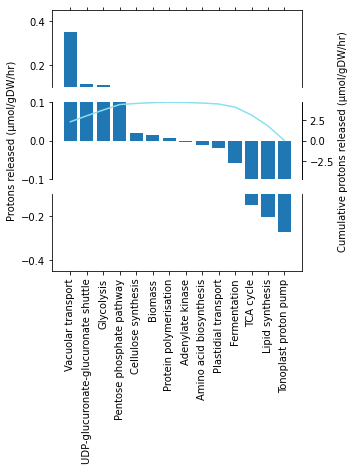

In [141]:
plot_protons(prot_budget_dict,savebool='fermentation',split=1,sumbool=1,ylim=0.45)

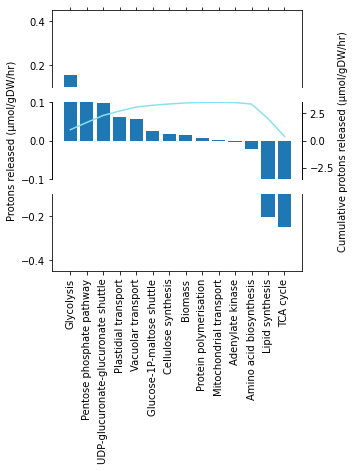

In [117]:
plot_protons(prot_budget_dictf,savebool='no_fermentation',split=1,sumbool=1,ylim=0.45)

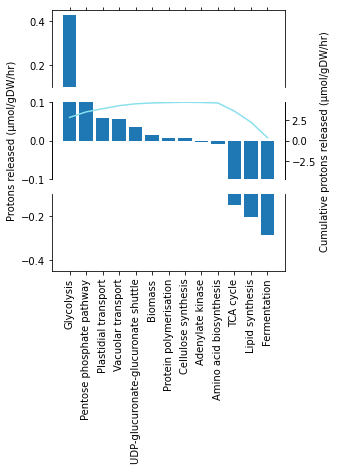

In [116]:
plot_protons(prot_budget_dictef,savebool='no_lactate_fermentation',split=1,sumbool=1,ylim=0.45)

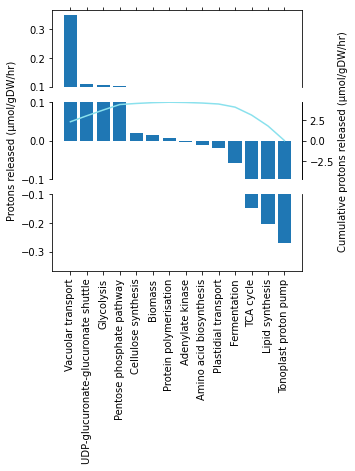

In [153]:
corprot,corprotf,corprotef=make_prot_dict(rmodel,sol,solf,solef,cell='_cor',excl=['_v_'])
plot_protons(corprot,savebool='cor_fermentation',split=1,sumbool=1)

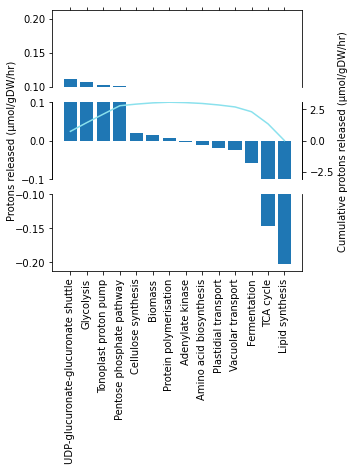

In [152]:
corprot,corprotf,corprotef=make_prot_dict(rmodel,sol,solf,solef,cell='_cor')
plot_protons(corprot,savebool='cor_fermentation',split=1,sumbool=1)

In [67]:
sol_protroot_dict_nosol={}
for x in list(sol_prot_dict_nosol.keys()):
    rxnroot = return_rxn_root(x)
    if rxnroot not in sol_protroot_dict_nosol.keys():
        sol_protroot_dict_nosol[rxnroot]=sol_prot_dict_nosol[x]
    else:
        if not sol_protroot_dict_nosol[rxnroot]==sol_prot_dict_nosol[x]:
            print(x)


In [80]:
all_rxns = list(set(list(sol_prot_dict_root.keys())+list(solf_prot_dict_root.keys())+list(solef_prot_dict_root.keys())))
all_rxns = sorted(all_rxns,key=lambda x: abs(sol_prot_dict_root[x]) if x in sol_prot_dict_root.keys() else 0,reverse=True)
csv_dict = {
'Reactions':all_rxns,
'Stoichiometry':[rmodel.reactions.get_by_id(x+'_epi00').reaction for x in all_rxns],
'Net proton flux': [sol_protroot_dict_nosol[x] for x in all_rxns],
'Pathway':[prot_rxn_pwy_dict[x] for x in all_rxns],
'Protons released in model':[sol_prot_dict_root[x] if x in sol_prot_dict_root.keys() else 0 for x in all_rxns],
'Protons released in model (no fermentation)':[solf_prot_dict_root[x] if x in solf_prot_dict_root.keys() else 0 for x in all_rxns],
'Protons released in model (no lactate fermentation)':[solef_prot_dict_root[x] if x in solef_prot_dict_root.keys() else 0 for x in all_rxns]
}

In [81]:
df=pd.DataFrame(csv_dict)
df.to_csv('Spreadsheets/Proton_balancing_table.csv')

# Shuttle sources

In [82]:
for key in list(prot_rxn_pwy_dict.keys()):
    if prot_rxn_pwy_dict[key]=='Shuttle':
        print(key)

2_PERIOD_7_PERIOD_7_PERIOD_44_RXN_c
RXN0_5184_c
2_PERIOD_4_PERIOD_1_PERIOD_111_RXN_c


In [83]:
rxnroot='RXN0_5184_c'
for rxn in rmodel.reactions:
    if rxnroot in rxn.id and solf[rxn.id]:
        print(round(solf[rxn.id],4),rxn.id,rxn.reaction)

-0.7246 RXN0_5184_c_epi00 Heteroglycans_c_epi00 + 0.7 Pi_c_epi00 + 0.3 aPi_c_epi00 <=> GLC_1_P_c_epi00 + 0.3 PROTON_c_epi00
0.5459 RXN0_5184_c_cor02 Heteroglycans_c_cor02 + 0.7 Pi_c_cor02 + 0.3 aPi_c_cor02 <=> GLC_1_P_c_cor02 + 0.3 PROTON_c_cor02
0.1787 RXN0_5184_c_per00 Heteroglycans_c_per00 + 0.7 Pi_c_per00 + 0.3 aPi_c_per00 <=> GLC_1_P_c_per00 + 0.3 PROTON_c_per00


In [94]:
rxnroot='2_PERIOD_7_PERIOD_7_PERIOD_44_RXN_c'
for rxn in rmodel.reactions:
    if rxnroot in rxn.id and solf[rxn.id]:
        print(round(solf[rxn.id],4),rxn.id,rxn.reaction)

0.9404 2_PERIOD_7_PERIOD_7_PERIOD_44_RXN_c_epi00 CPD_510_c_epi00 + 0.85 PROTON_c_epi00 + 0.5 UTP_c_epi00 + 0.5 aUTP_c_epi00 <=> 0.65 PPI_c_epi00 + UDP_GLUCURONATE_c_epi00 + 0.35 aPPI_c_epi00
-0.3557 2_PERIOD_7_PERIOD_7_PERIOD_44_RXN_c_cor01 CPD_510_c_cor01 + 0.85 PROTON_c_cor01 + 0.5 UTP_c_cor01 + 0.5 aUTP_c_cor01 <=> 0.65 PPI_c_cor01 + UDP_GLUCURONATE_c_cor01 + 0.35 aPPI_c_cor01
-0.406 2_PERIOD_7_PERIOD_7_PERIOD_44_RXN_c_cor02 CPD_510_c_cor02 + 0.85 PROTON_c_cor02 + 0.5 UTP_c_cor02 + 0.5 aUTP_c_cor02 <=> 0.65 PPI_c_cor02 + UDP_GLUCURONATE_c_cor02 + 0.35 aPPI_c_cor02
-0.1787 2_PERIOD_7_PERIOD_7_PERIOD_44_RXN_c_end00 CPD_510_c_end00 + 0.85 PROTON_c_end00 + 0.5 UTP_c_end00 + 0.5 aUTP_c_end00 <=> 0.65 PPI_c_end00 + UDP_GLUCURONATE_c_end00 + 0.35 aPPI_c_end00


In [95]:
rxnroot='2_PERIOD_4_PERIOD_1_PERIOD_111_RXN_c'
for rxn in rmodel.reactions:
    if rxnroot in rxn.id and solf[rxn.id]:
        print(round(solf[rxn.id],4),rxn.id,rxn.reaction)

0.1052 2_PERIOD_4_PERIOD_1_PERIOD_111_RXN_c_epi00 CONIFERYL_ALCOHOL_c_epi00 + 0.5 PROTON_c_epi00 + UDP_GLUCOSE_c_epi00 --> CPD_1777_c_epi00 + 0.5 UDP_c_epi00 + 0.5 aUDP_c_epi00


In [133]:
epiprot,epiprotf,epiprotef=make_prot_dict(rmodel,sol,solf,solef,cell='_epi')

[<Metabolite PROTON_p_epi00 at 0x7fbe738b2fd0>, <Metabolite PROTON_l_epi00 at 0x7fbe738b2070>, <Metabolite PROTON_m_epi00 at 0x7fbe738b2d60>, <Metabolite PROTON_i_epi00 at 0x7fbe738b2a60>, <Metabolite PROTON_x_epi00 at 0x7fbe50f913d0>, <Metabolite PROTON_c_epi00 at 0x7fbe50f91130>]


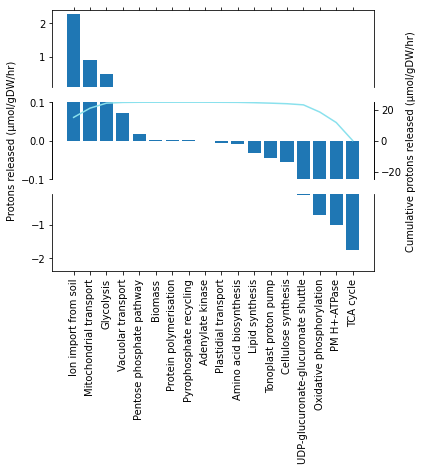

In [134]:
plot_protons(epiprot,savebool='epi_fermentation',split=1,sumbool=1)

[<Metabolite PROTON_c_end00 at 0x7fbe514d14c0>, <Metabolite PROTON_p_end00 at 0x7fbe514d1190>, <Metabolite PROTON_m_end00 at 0x7fbe514d1df0>, <Metabolite PROTON_i_end00 at 0x7fbe514d1610>, <Metabolite PROTON_x_end00 at 0x7fbe514efe50>, <Metabolite PROTON_l_end00 at 0x7fbe418b7b20>]


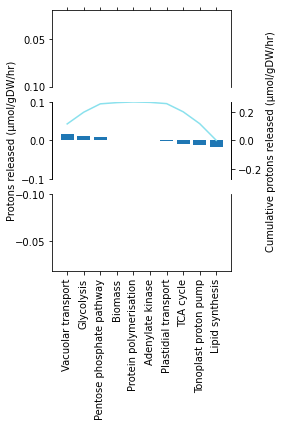

In [132]:
endprot,endprotf,endprotef=make_prot_dict(rmodel,sol,solf,solef,cell='_end')
plot_protons(endprot,savebool='end_fermentation',split=1,sumbool=1)

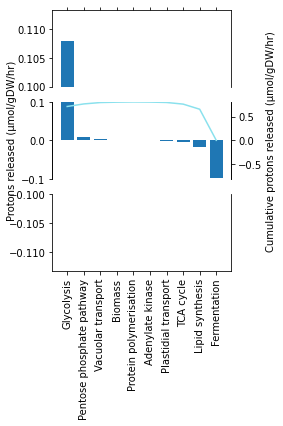

In [93]:
perprot,perprotf,perprotef=make_prot_dict(rmodel,sol,solf,solef,cell='_per')
plot_protons(perprot,savebool='per_fermentation',split=1,sumbool=1)

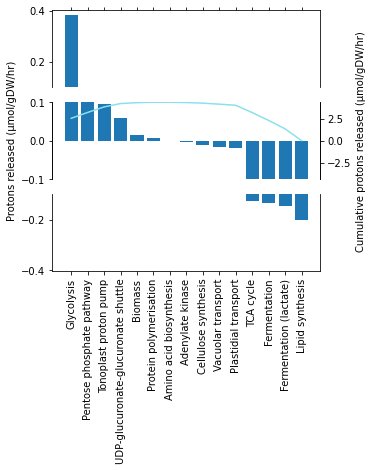

In [182]:
pcorprot,pcorprotf,pcorprotef=make_prot_dict(rmodel,solp,solp,solp,cell='_cor')
plot_protons(pcorprot,savebool='pcor_fermentation',split=1,sumbool=1)

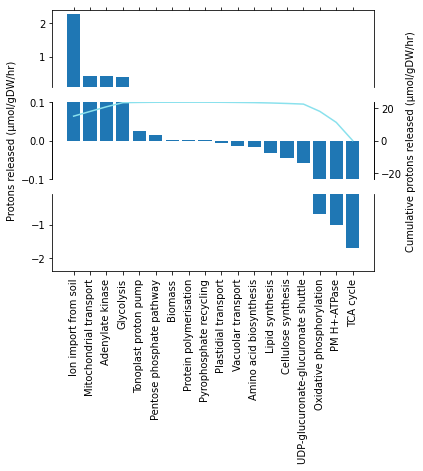

In [177]:
pepiprot,pepiprotf,pepiprotef=make_prot_dict(rmodel,solp,solp,solp,cell='_epi')
plot_protons(pepiprot,savebool='pepi_fermentation',split=1,sumbool=1)

In [168]:
solp['ETOH_ec_epi00']

0.8998248867929196

# Quick,...

In [96]:
corprotc.keys()

dict_keys(['Protein polymerisation', 'Glycolysis', 'Mitochondrial metabolite uptake', 'Plastidial metabolite uptake', 'Vacuolar metabolite uptake', 'Tonoplast proton pump', 'Adenylate kinase', 'Cell maintenance', 'Malate dehydrogenase (c)', 'Cellulose synthesis', 'Fermentation (lactate)', 'UDP-glucuronate-glucuronate shuttle', 'Amino acid degradation', 'Fermentation (ethanol)', 'Mannose shuttle'])

In [102]:
print(corprotc['UDP-glucuronate-glucuronate shuttle']/sum([corprotc[x] for x in list(corprotc.keys()) if corprotc[x]>0]))
print(corprotc['Protein polymerisation']/sum([corprotc[x] for x in list(corprotc.keys()) if corprotc[x]>0]))


0.07288335268244298
0.026252271156542425


In [101]:
print(corprotp['Pentose phosphate pathway']/sum([corprotp[x] for x in list(corprotp.keys()) if corprotp[x]>0]))
print(corprotp['Pentose phosphate pathway']/sum([corprotc[x] for x in list(corprotc.keys()) if corprotc[x]>0]))
print(corprotp['Pentose phosphate pathway']/sum([corprot[x] for x in list(corprot.keys()) if corprot[x]>0]))

0.2995071158862353
0.11596430592388443
0.10608126685310026


In [100]:
corprot,corprotf,temp=make_prot_dict(rmodel,sol,solf,solef,cell='_cor',metroot='PROTON_')

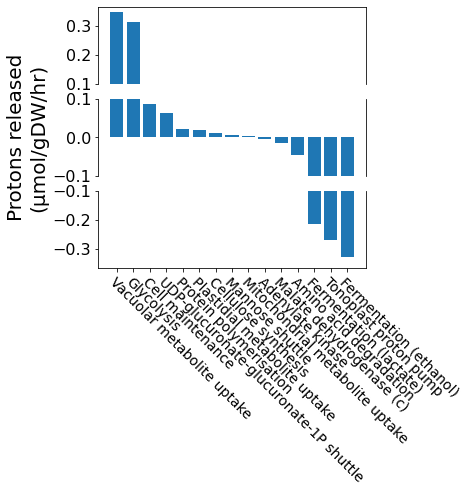

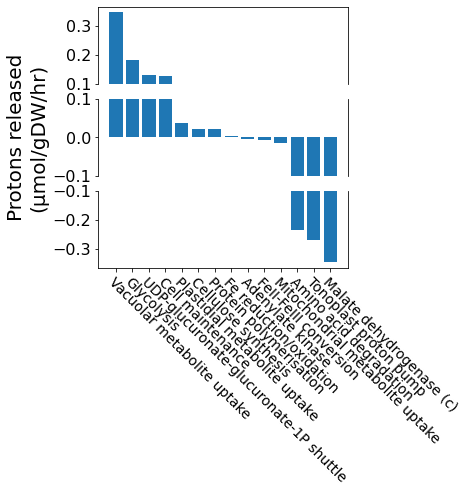

In [16]:
corprotc,corprotcf,corprotcef=make_prot_dict(rmodel,sol,solf,solef,cell='_cor')
plot_protons(corprotc,savebool='cor_c',split=1,sumbool=0)
plot_protons(corprotcf,savebool='cor_c_noferm',split=1,sumbool=0)

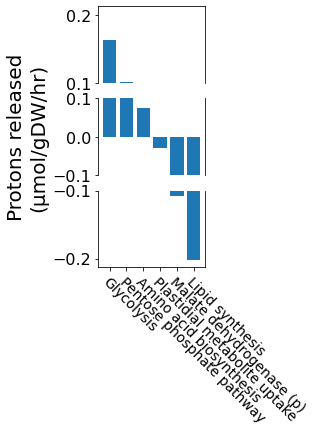

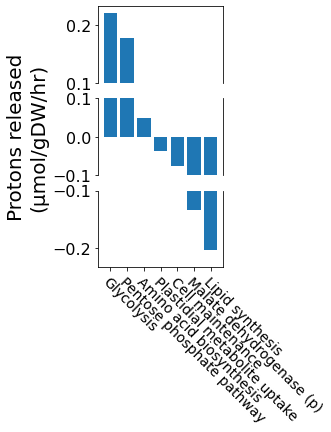

In [17]:
corprotp,corprotpf,temp=make_prot_dict(rmodel,sol,solf,solef,cell='_cor',metroot='PROTON_p')
plot_protons(corprotp,savebool='cor_p',split=1,sumbool=0)
plot_protons(corprotpf,savebool='cor_p_noferm',split=1,sumbool=0)

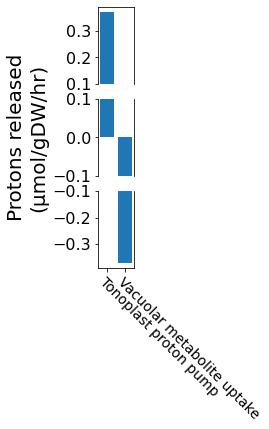

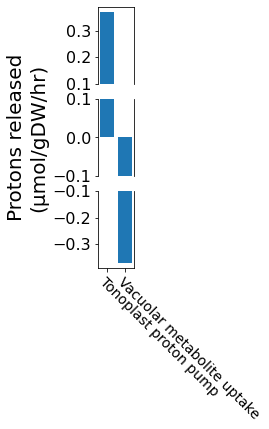

In [20]:
corprotp,corprotpf,temp=make_prot_dict(rmodel,sol,solf,solef,cell='_cor',metroot='PROTON_v')
plot_protons(corprotp,savebool='cor_v',split=1,sumbool=0)
plot_protons(corprotpf,savebool='cor_v_noferm',split=1,sumbool=0)

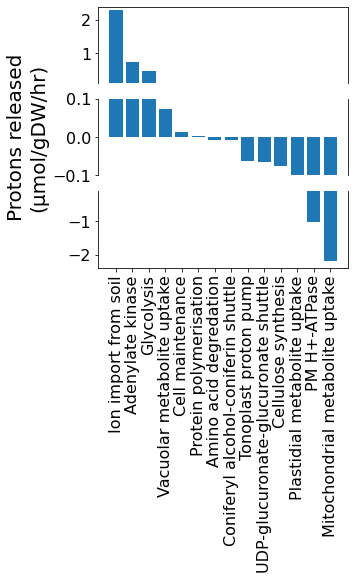

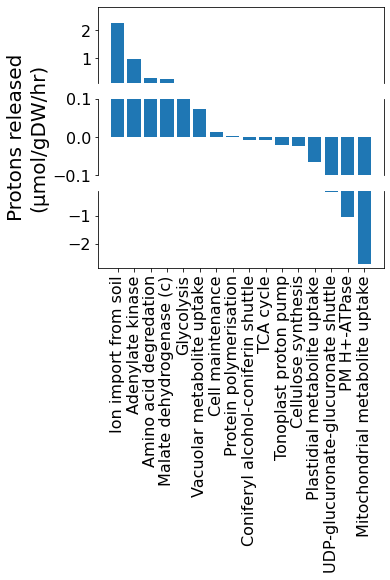

In [65]:
epiprot,epiprotf,epiprotef=make_prot_dict(rmodel,sol,solef,solef,cell='_epi')
plot_protons(epiprot,savebool='epi_test',split=1,sumbool=0)
plot_protons(epiprotf,savebool='epi_test_noferm',split=1,sumbool=0)

In [59]:
prot_rxn_pwy_dict['2_PERIOD_7_PERIOD_7_PERIOD_13_RXN_c']

KeyError: '2_PERIOD_7_PERIOD_7_PERIOD_13_RXN_c'

# Junk

In [192]:
rxnroot='ETOH'
for rxn in rmodel.reactions:
    if rxnroot in rxn.id and sol[rxn.id]:
        print(round(sol[rxn.id],4),rxn.id,rxn.reaction)

-0.5159 ETOH_c_cor00_Transfer_00_to_01 ETOH_c_cor00 <=> ETOH_c_cor01
-0.5159 ETOH_c_cor01_Transfer_01_to_02 ETOH_c_cor01 <=> ETOH_c_cor02
-0.5058 ETOH_c_cor02_Transfer_02_to_03 ETOH_c_cor02 <=> ETOH_c_cor03
-0.5058 ETOH_c_cor03_Transfer_03_to_04 ETOH_c_cor03 <=> ETOH_c_cor04
-0.4288 ETOH_c_cor04_Transfer_04_to_05 ETOH_c_cor04 <=> ETOH_c_cor05
-0.3371 ETOH_c_cor05_Transfer_05_to_06 ETOH_c_cor05 <=> ETOH_c_cor06
-0.3371 ETOH_c_cor06_Transfer_06_to_07 ETOH_c_cor06 <=> ETOH_c_cor07
-0.5188 ETOH_c_epi00_Transfer_epi00_to_cor00 ETOH_c_epi00 <=> ETOH_c_cor00
-0.3269 ETOH_c_cor07_Transfer_cor07_to_end00 ETOH_c_cor07 <=> ETOH_c_end00
-0.3269 ETOH_c_end00_Transfer_end00_to_per00 ETOH_c_end00 <=> ETOH_c_per00
0.5188 ETOH_tx_epi00 ETOH_e_epi00 --> 
0.5188 ETOH_ec_epi00 ETOH_c_epi00 --> ETOH_e_epi00


In [189]:
met='L_LACTATE_c_cor04'
for rxn in rmodel.metabolites.get_by_id(met).reactions:
    if sol[rxn.id]:
        print(round(sol[rxn.id]*rxn.get_coefficient(met),4),rxn.id,rxn.reaction)

0.6376 L_LACTATEDEHYDROG_RXN_c_cor04 NADH_c_cor04 + PROTON_c_cor04 + PYRUVATE_c_cor04 --> L_LACTATE_c_cor04 + NAD_c_cor04
0.2097 L_LACTATE_c_cor04_Transfer_04_to_05 L_LACTATE_c_cor04 <=> L_LACTATE_c_cor05
-0.8472 L_LACTATE_c_cor03_Transfer_03_to_04 L_LACTATE_c_cor03 <=> L_LACTATE_c_cor04


In [73]:
lipid_synth_rxn_stubs=[x for x in list(prot_rxn_pwy_dict.keys()) if prot_rxn_pwy_dict[x]=='Lipid synthesis']
lipid_synth_rxns = [x for x in rmodel.reactions if any([str(y) in x.id for y in lipid_synth_rxn_stubs])]
for rxn in lipid_synth_rxns:
    prot_met = [met for met in rxn.metabolites if 'PROTON' in met.id]
    prot_flux = [sol[rxn.id]*rxn.get_coefficient(x.id) for x in prot_met]
    print(rxn.id,sol[rxn.id],prot_flux)

RXN_9532_p_epi00 0.01550895850802706 [-0.01550895850802706]
RXN_9663_p_epi00 0.01550895850802706 [-0.01550895850802706]
RXN_9652_p_epi00 0.01550895850802706 [-0.01550895850802706]
Beta_Oxidation_x_epi00 0.0 [0.0]
RXN_9661_p_epi00 0.01550895850802706 [-0.01550895850802706]
RXN_9650_p_epi00 0.01550895850802706 [-0.01550895850802706]
RXN_9536_p_epi00 0.01550895850802706 [-0.01550895850802706]
2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_epi00 0.01550895850802706 [-0.01550895850802706]
RXN_9654_p_epi00 0.01550895850802706 [-0.01550895850802706]
RXN0_5224_p_epi00 0.10856270955618941 [0.10856270955618941]
ACETYL_COA_CARBOXYLTRANSFER_RXN_p_epi00 0.10856270955618941 [0.09770643860057047]
RXN_9658_p_epi00 0.01550895850802706 [-0.01550895850802706]
RXN_9514_p_epi00 0.01550895850802706 [-0.01550895850802706]
RXN_9660_p_epi00 0.01550895850802706 [-0.01550895850802706]
RXN_9518_p_epi00 0.01550895850802706 [-0.01550895850802706]
RXN_9653_p_epi00 0.01550895850802706 [-0.01550895850802706]
RXN_9662_p_epi00 0.

In [195]:
met='ACETALD_c_cor02'
for rxn in rmodel.metabolites.get_by_id(met).reactions:
    if sol[rxn.id]:
        print(round(sol[rxn.id]*rxn.get_coefficient(met),4),rxn.id,rxn.reaction)

0.0102 RXN_6161_c_cor02 PROTON_c_cor02 + PYRUVATE_c_cor02 --> ACETALD_c_cor02 + CARBON_DIOXIDE_c_cor02
-0.0102 ALCOHOL_DEHYDROG_RXN_c_cor02 ETOH_c_cor02 + NAD_c_cor02 --> ACETALD_c_cor02 + NADH_c_cor02 + PROTON_c_cor02


In [164]:
for var in rmodel.variables[-2:]:
    print(var.name)
    # break

ETOH_ec_epi00
ETOH_ec_epi00_reverse_ae4d9


# Functions

In [5]:
def make_prot_dict(rmodel,sol,solf,solef,cell='_cor',excl=[],thresh=1e-5,metroot = 'PROTON_c'):
    mets = [met for met in rmodel.metabolites if metroot in met.id and cell in met.id and not any([x in met.id for x in ['_e_','_ph_','_xy_']+excl])]
    # print(mets)
    sol_prot_dict={}
    solf_prot_dict={}
    solef_prot_dict={}
    rxns=[]
    rxnfs=[]
    rxnefs=[]
    for met in mets:
        for rxn in met.reactions:
            if sol[rxn.id]:
                if rxn.id not in sol_prot_dict.keys():
                    sol_prot_dict[rxn.id]=0
                sol_prot_dict[rxn.id]+=sol[rxn.id]*rxn.get_coefficient(met.id)
                rxns+=[rxn]    
            if solf[rxn.id]:
                if rxn.id not in solf_prot_dict.keys():
                    solf_prot_dict[rxn.id]=0
                solf_prot_dict[rxn.id]=solf[rxn.id]*rxn.get_coefficient(met.id)
                rxnfs+=[rxn]
            if solef[rxn.id]:
                if rxn.id not in solef_prot_dict.keys():
                    solef_prot_dict[rxn.id]=0
                solef_prot_dict[rxn.id]=solef[rxn.id]*rxn.get_coefficient(met.id)
                rxnefs+=[rxn]
    sol_prot_dict_nosol={}
    for met in mets:
        for rxn in met.reactions:
            if sol[rxn.id]or solf[rxn.id] or solef[rxn.id]:
                if rxn.id not in sol_prot_dict_nosol.keys():
                    sol_prot_dict_nosol[rxn.id]=0
                sol_prot_dict_nosol[rxn.id]+=rxn.get_coefficient(met.id)
            
    sol_prot_dict_root={}
    solf_prot_dict_root={}
    solef_prot_dict_root={}
    rxns=list(set(rxns))
    rxnfs=list(set(rxnfs))
    rxnefs=list(set(rxnefs))

    for rxn in rxns:
        rxnroot = return_rxn_root(rxn.id)
        if rxnroot not in sol_prot_dict_root.keys():
            sol_prot_dict_root[rxnroot]=0
        sol_prot_dict_root[rxnroot]+=sol_prot_dict[rxn.id]
    for rxn in rxnfs:
        rxnroot = return_rxn_root(rxn.id)
        if rxnroot not in solf_prot_dict_root.keys():
            solf_prot_dict_root[rxnroot]=0
        solf_prot_dict_root[rxnroot]+=solf_prot_dict[rxn.id]
    for rxn in rxnefs:
        rxnroot = return_rxn_root(rxn.id)
        if rxnroot not in solef_prot_dict_root.keys():
            solef_prot_dict_root[rxnroot]=0
        solef_prot_dict_root[rxnroot]+=solef_prot_dict[rxn.id]

    prot_budget_dict={}
    prot_budget_dictf={}
    prot_budget_dictef={}
    for key in list(sol_prot_dict_root.keys()):
        pwy = prot_rxn_pwy_dict[key]
        if pwy not in prot_budget_dict.keys():
            prot_budget_dict[pwy]=0
        prot_budget_dict[pwy]+=sol_prot_dict_root[key]
    # print(prot_budget_dict)
    for key in list(prot_budget_dict.keys()):
        if abs(prot_budget_dict[key])<thresh:
            prot_budget_dict.pop(key)

    for key in list(solf_prot_dict_root.keys()):
        pwy = prot_rxn_pwy_dict[key]
        if pwy not in prot_budget_dictf.keys():
            prot_budget_dictf[pwy]=0
        prot_budget_dictf[pwy]+=solf_prot_dict_root[key]
    for key in list(prot_budget_dictf.keys()):
        if abs(prot_budget_dictf[key])<thresh:
            prot_budget_dictf.pop(key)

    for key in list(solef_prot_dict_root.keys()):
        pwy = prot_rxn_pwy_dict[key]
        if pwy not in prot_budget_dictef.keys():
            prot_budget_dictef[pwy]=0
        prot_budget_dictef[pwy]+=solef_prot_dict_root[key]
    for key in list(prot_budget_dictef.keys()):
        if abs(prot_budget_dictef[key])<thresh:
            prot_budget_dictef.pop(key)
    return prot_budget_dict,prot_budget_dictf,prot_budget_dictef

def return_rxn_root(rxnid):
    rxnroot='_'.join(rxnid.split('_')[:-1])
    return rxnroot

In [200]:
import numpy as np
np.log(2)/3.235596

0.21422550298614082